# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
#pip install citipy

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [9]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url


'http://api.openweathermap.org/data/2.5/weather?appid=9a4382c1ec65bc1fed1f3ce1f7a879a5&units=metric&q='

In [10]:
# set up lists to hold reponse info
city_list=[]
lat=[]
lng=[]
temp = []
humidity=[]
cloudiness=[]
windspeed=[]
country=[]
date=[]

record=0
setnum=1

print(f"Beginning Data Retrieval")
print(f"---------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
  
    if record < 50:
        record += 1
    else:
        setnum += 1
        record = 1
   
    
    print('Processing record of {} of set {} | {}'.format(record, setnum, city))
   
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_list.append(city)
        
    except:
        print(f"City not found. Skipping...")
        pass
   
print(f"---------------------------")
print(f"Data Retrieval Complete")      
print(f"---------------------------")

Beginning Data Retrieval
---------------------------
Processing record of 1 of set 1 | albany
Processing record of 2 of set 1 | clyde river
Processing record of 3 of set 1 | urucara
Processing record of 4 of set 1 | bluff
Processing record of 5 of set 1 | saskylakh
Processing record of 6 of set 1 | karkaralinsk
City not found. Skipping...
Processing record of 7 of set 1 | bredasdorp
Processing record of 8 of set 1 | illoqqortoormiut
City not found. Skipping...
Processing record of 9 of set 1 | castro
Processing record of 10 of set 1 | dikson
Processing record of 11 of set 1 | muroto
Processing record of 12 of set 1 | rikitea
Processing record of 13 of set 1 | chimbote
Processing record of 14 of set 1 | kawalu
Processing record of 15 of set 1 | victoria
Processing record of 16 of set 1 | ushuaia
Processing record of 17 of set 1 | salalah
Processing record of 18 of set 1 | saint-philippe
Processing record of 19 of set 1 | ilulissat
Processing record of 20 of set 1 | punta arenas
Processi

Processing record of 23 of set 4 | tokur
Processing record of 24 of set 4 | bengkulu
Processing record of 25 of set 4 | maine-soroa
Processing record of 26 of set 4 | khakurinokhabl
Processing record of 27 of set 4 | louisbourg
City not found. Skipping...
Processing record of 28 of set 4 | hami
Processing record of 29 of set 4 | ucluelet
Processing record of 30 of set 4 | touros
Processing record of 31 of set 4 | poum
Processing record of 32 of set 4 | posse
Processing record of 33 of set 4 | sentyabrskiy
City not found. Skipping...
Processing record of 34 of set 4 | east london
Processing record of 35 of set 4 | barrow
Processing record of 36 of set 4 | sioux lookout
Processing record of 37 of set 4 | klaksvik
Processing record of 38 of set 4 | cabo san lucas
Processing record of 39 of set 4 | yellowknife
Processing record of 40 of set 4 | los llanos de aridane
Processing record of 41 of set 4 | kruisfontein
Processing record of 42 of set 4 | renqiu
Processing record of 43 of set 4 | 

Processing record of 4 of set 8 | kendari
Processing record of 5 of set 8 | tsaratanana
Processing record of 6 of set 8 | margate
Processing record of 7 of set 8 | sinnamary
Processing record of 8 of set 8 | nizhneyansk
City not found. Skipping...
Processing record of 9 of set 8 | bazarnyye mataki
Processing record of 10 of set 8 | lysva
Processing record of 11 of set 8 | iwanai
Processing record of 12 of set 8 | salug
Processing record of 13 of set 8 | hargeysa
Processing record of 14 of set 8 | rolim de moura
City not found. Skipping...
Processing record of 15 of set 8 | mednogorskiy
Processing record of 16 of set 8 | lodwar
Processing record of 17 of set 8 | bar harbor
Processing record of 18 of set 8 | nara
Processing record of 19 of set 8 | stornoway
Processing record of 20 of set 8 | sibut
Processing record of 21 of set 8 | eureka
Processing record of 22 of set 8 | placido de castro
Processing record of 23 of set 8 | suluova
Processing record of 24 of set 8 | saleaula
City not fo

Processing record of 27 of set 11 | awjilah
Processing record of 28 of set 11 | todos santos
Processing record of 29 of set 11 | redlands
Processing record of 30 of set 11 | grand river south east
City not found. Skipping...
Processing record of 31 of set 11 | bilibino
Processing record of 32 of set 11 | artyk
City not found. Skipping...
Processing record of 33 of set 11 | petauke
Processing record of 34 of set 11 | lompoc
Processing record of 35 of set 11 | narkevychi
Processing record of 36 of set 11 | mitchell
Processing record of 37 of set 11 | dingle
Processing record of 38 of set 11 | ayagoz
Processing record of 39 of set 11 | pennagaram
Processing record of 40 of set 11 | kuah
Processing record of 41 of set 11 | sapa
Processing record of 42 of set 11 | riyadh
Processing record of 43 of set 11 | nome
Processing record of 44 of set 11 | bolungarvik
City not found. Skipping...
Processing record of 45 of set 11 | hasaki
Processing record of 46 of set 11 | gigmoto
Processing record o

In [11]:
# creating a data frame from cities, lat, temp, humidity, cloudiness, windspeed, country and date
weather_dict = {
    "City": city_list,
    "Lat": lat,
    "Lng":lng,
    "Max_temp": temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Windspeed": windspeed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max_temp,Humidity,Cloudiness,Windspeed,Country,Date
0,albany,42.6001,-73.9662,-11.25,62,26,3.57,US,1644894018
1,clyde river,70.4692,-68.5914,-29.44,94,100,1.61,CA,1644894087
2,urucara,-2.5364,-57.7600,22.74,98,100,0.94,BR,1644894087
3,bluff,-46.6000,168.3333,21.56,61,80,3.05,NZ,1644894087
4,saskylakh,71.9167,114.0833,-29.32,87,75,0.54,RU,1644894087


In [12]:
weather_data.describe()

,Lat,Lng,Max_temp,Humidity,Cloudiness,Windspeed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,20.396976,17.659998,9.277491,73.704947,55.395760,3.591184,1.644894e+09
std,33.733189,91.921811,17.858587,19.851828,40.424065,2.952441,8.871016e+01
min,-54.800000,-179.166700,-38.000000,5.000000,0.000000,0.000000,1.644894e+09
25%,-8.089750,-65.003875,-2.227500,64.000000,10.000000,1.632500,1.644894e+09
50%,24.097350,22.782350,14.490000,77.000000,65.500000,2.720000,1.644894e+09
75%,48.845500,101.301300,23.992500,89.000000,99.000000,4.630000,1.644894e+09
max,78.218600,179.316700,38.030000,100.000000,100.000000,22.030000,1.644894e+09


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_data.to_csv("../output_data/weather_data.csv", index=False, header=True)
weather_data

,City,Lat,Lng,Max_temp,Humidity,Cloudiness,Windspeed,Country,Date
0,albany,42.6001,-73.9662,-11.25,62,26,3.57,US,1644894018
1,clyde river,70.4692,-68.5914,-29.44,94,100,1.61,CA,1644894087
2,urucara,-2.5364,-57.7600,22.74,98,100,0.94,BR,1644894087
3,bluff,-46.6000,168.3333,21.56,61,80,3.05,NZ,1644894087
4,saskylakh,71.9167,114.0833,-29.32,87,75,0.54,RU,1644894087
...,...,...,...,...,...,...,...,...,...
561,melbu,68.5044,14.8297,-3.20,67,14,1.38,NO,1644894291
562,quirinopolis,-18.4483,-50.4517,21.66,90,6,1.63,BR,1644894291
563,yatou,37.1500,122.3833,-1.87,43,89,6.86,CN,1644894292
564,jhanjharpur,26.2667,86.2833,17.53,54,0,2.28,IN,1644894292


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
humid_df=weather_data.loc[weather_data["Humidity"] > 100]
humid_df

,City,Lat,Lng,Max_temp,Humidity,Cloudiness,Windspeed,Country,Date


In [15]:
#  Get the indices of cities that have humidity over 100%.
humid_df.index

Int64Index([], dtype='int64')

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data.drop(weather_data[weather_data['Humidity'] > 100].index, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max_temp,Humidity,Cloudiness,Windspeed,Country,Date
0,albany,42.6001,-73.9662,-11.25,62,26,3.57,US,1644894018
1,clyde river,70.4692,-68.5914,-29.44,94,100,1.61,CA,1644894087
2,urucara,-2.5364,-57.7600,22.74,98,100,0.94,BR,1644894087
3,bluff,-46.6000,168.3333,21.56,61,80,3.05,NZ,1644894087
4,saskylakh,71.9167,114.0833,-29.32,87,75,0.54,RU,1644894087


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

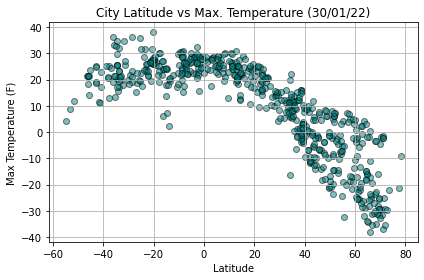

In [17]:
x_axis = weather_data["Lat"]
y_axis = weather_data["Max_temp"]

plt.scatter(x_axis,y_axis, c ="teal", edgecolor ="black", alpha=0.50)
plt.title('City Latitude vs Max. Temperature (30/01/22)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.grid(which='major', linestyle='-')

plt.tight_layout()

plt.savefig("../Images/lat_temp.png")
plt.show()


The latitude and temperature are inversely proportional according to the plot above. 
Lower the latitude higher is the temperature and vice-versa.

## Latitude vs. Humidity Plot

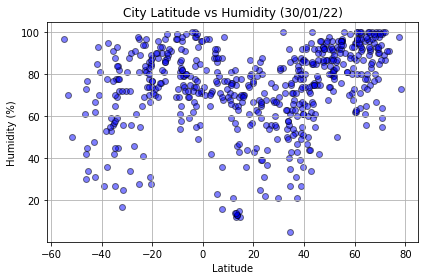

In [18]:
x_axis = weather_data["Lat"]
y_axis = weather_data["Humidity"]

plt.scatter(x_axis,y_axis, c ="blue", edgecolor ="black", alpha=0.50)
plt.title('City Latitude vs Humidity (30/01/22)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.grid(which='major', linestyle='-')

plt.tight_layout()

plt.savefig("../Images/lat_humid.png")
plt.show()


Humidity and latitude are not related. Humidity tends to vary with cities with veying latitudes.

## Latitude vs. Cloudiness Plot

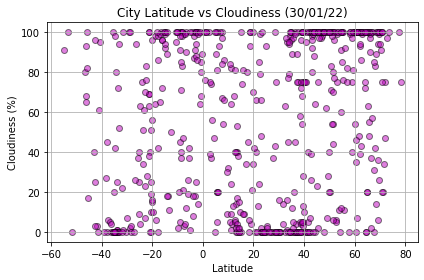

In [20]:
x_axis = weather_data["Lat"]
y_axis = weather_data["Cloudiness"]

plt.scatter(x_axis,y_axis, c ="m", edgecolor ="black", alpha=0.50)
plt.title('City Latitude vs Cloudiness (30/01/22)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid(which='major', linestyle='-')

plt.tight_layout()

plt.savefig("../Images/lat_cloud.png")
plt.show()


Cloudiness and latitude are not related.

## Latitude vs. Wind Speed Plot

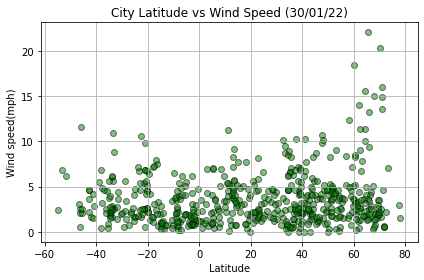

In [21]:
x_axis = weather_data["Lat"]
y_axis = weather_data["Windspeed"]

plt.scatter(x_axis,y_axis, c ="g", edgecolor ="black", alpha=0.50)
plt.title('City Latitude vs Wind Speed (30/01/22)')
plt.xlabel('Latitude')
plt.ylabel('Wind speed(mph)')

plt.grid(which='major', linestyle='-')

plt.tight_layout()

plt.savefig("../Images/lat_wind.png")
plt.show()


There seems to be no relation between windspeed and latitude.

## Linear Regression

In [22]:
#Obtaining cities in northern hemisphere and creating a new dataframe
north_hemis = weather_data.loc[weather_data['Lat'] > 0]
north_hemis.head()

,City,Lat,Lng,Max_temp,Humidity,Cloudiness,Windspeed,Country,Date
0,albany,42.6001,-73.9662,-11.25,62,26,3.57,US,1644894018
1,clyde river,70.4692,-68.5914,-29.44,94,100,1.61,CA,1644894087
4,saskylakh,71.9167,114.0833,-29.32,87,75,0.54,RU,1644894087
7,dikson,73.5069,80.5464,-21.99,91,100,7.02,RU,1644894089
8,muroto,33.2833,134.1500,12.41,54,16,8.67,JP,1644894089


In [23]:
#Obtaining cities in southern hemisphere and creating a new dataframe
south_hemis = weather_data.loc[weather_data['Lat'] < 0]
south_hemis.head()

,City,Lat,Lng,Max_temp,Humidity,Cloudiness,Windspeed,Country,Date
2,urucara,-2.5364,-57.7600,22.74,98,100,0.94,BR,1644894087
3,bluff,-46.6000,168.3333,21.56,61,80,3.05,NZ,1644894087
5,bredasdorp,-34.5322,20.0403,20.16,88,42,1.97,ZA,1644894088
6,castro,-24.7911,-50.0119,17.50,89,63,1.64,BR,1644894088
9,rikitea,-23.1203,-134.9692,25.89,69,61,4.62,PF,1644894090


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.87


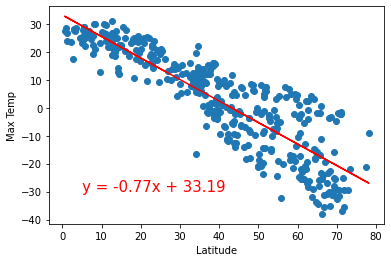

In [24]:
# Calculating the correlation coefficient

x_axis=north_hemis["Lat"]
y_axis=north_hemis["Max_temp"]
correlation = st.pearsonr(x_axis, y_axis)
print(f"The r-value is {round(correlation[0],2)}")

# Calculating the linear regression model 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,-30),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("../Images/lattemp_north.png")

plt.show()

Analysis:

The plot of latitudes of northern hemisphere cities against temprature shows a moderate negative correlation, 
which means that latitude and temperature are inversely proportional. 
As the latitude increases the temperature decreases and vice-versa.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.29


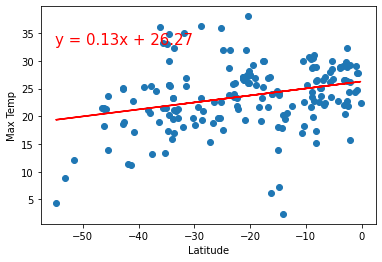

In [25]:
# Calculating the correlation coefficient

x_axis=south_hemis["Lat"]
y_axis=south_hemis["Max_temp"]
correlation = st.pearsonr(x_axis, y_axis)
print(f"The r-value is {round(correlation[0],2)}")

# Calculating the linear regression model 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,33),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("../Images/lattemp_south.png")
plt.show()

Analysis:

The plot of latitudes of southern hemisphere cities against temprature shows a weak correlation, 
which means that latitude and temperature are not related. The temperature does not depend on the latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.46


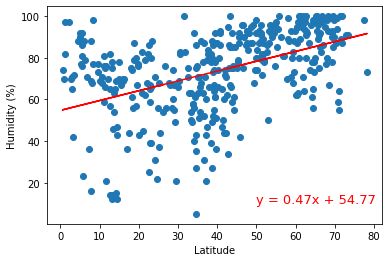

In [26]:
# Calculating the correlation coefficient

x_axis=north_hemis["Lat"]
y_axis=north_hemis["Humidity"]
correlation = st.pearsonr(x_axis, y_axis)
print(f"The r-value is {round(correlation[0],2)}")

# Calculating the linear regression model 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=13,color="r")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../Images/lathum_north.png")
plt.show()

Analysis:

The plot of latitudes of northern hemisphere cities against humidity shows a weak correlation, 
which means that latitude and humidity are not related.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.37


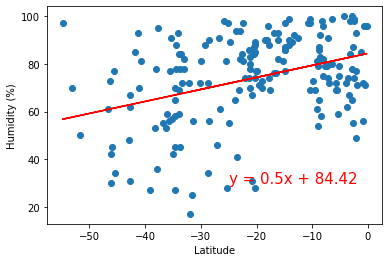

In [27]:
# Calculating the correlation coefficient

x_axis=south_hemis["Lat"]
y_axis=south_hemis["Humidity"]
correlation = st.pearsonr(x_axis, y_axis)
print(f"The r-value is {round(correlation[0],2)}")

# Calculating the linear regression model 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plt.savefig("../Images/lathum_south.png")
plt.show()

Analysis:

The plot of latitudes of southern hemisphere cities against humidity shows a weak correlation, 
which means that latitude and humidity are not related.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.29


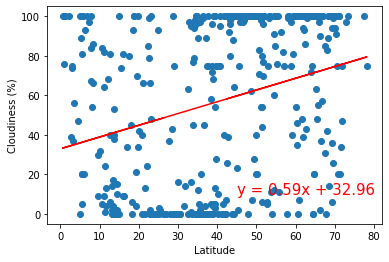

In [28]:
# Calculating the correlation coefficient

x_axis=north_hemis["Lat"]
y_axis=north_hemis["Cloudiness"]
correlation = st.pearsonr(x_axis, y_axis)
print(f"The r-value is {round(correlation[0],2)}")

# Calculating the linear regression model 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


plt.savefig("../Images/latcloud_north.png")
plt.show()

Analysis:

The plot of latitudes of northern hemisphere cities against cloudiness shows a very weak correlation, 
which means that latitude and cloudiness are not related.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.32


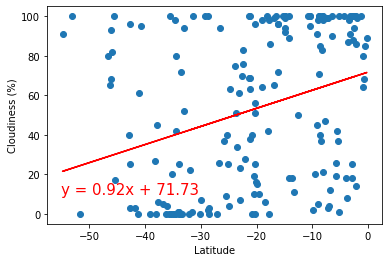

In [29]:
# Calculating the correlation coefficient

x_axis=south_hemis["Lat"]
y_axis=south_hemis["Cloudiness"]
correlation = st.pearsonr(x_axis, y_axis)
print(f"The r-value is {round(correlation[0],2)}")


# Calculating the linear regression model 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("../Images/latcloud_south.png")
plt.show()

Analysis:

The plot of latitudes of southern hemisphere cities against cloudiness suggests a very weak correlation, 
which means the latitude and cloudiness are not related.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.15


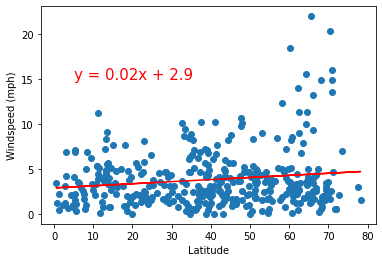

In [30]:
# Calculating the correlation coefficient

x_axis=north_hemis["Lat"]
y_axis=north_hemis["Windspeed"]
correlation = st.pearsonr(x_axis, y_axis)
print(f"The r-value is {round(correlation[0],2)}")

# Calculating the linear regression model 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,15),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")


plt.savefig("../Images/latwind_north.png")
plt.show()

Analysis:

The plot of latitudes of northern hemisphere cities against windspeed shows a very weak correlation, 
which means that latitude and windspeed are not related.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.23


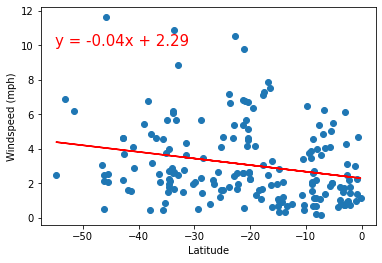

In [31]:
# Calculating the correlation coefficient

x_axis=south_hemis["Lat"]
y_axis=south_hemis["Windspeed"]
correlation = st.pearsonr(x_axis, y_axis)
print(f"The r-value is {round(correlation[0],2)}")

# Calculating the linear regression model 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")

plt.savefig("../Images/latwind_south.png")
plt.show()

Analysis:

The plot of latitudes of southern hemisphere cities against humidity shows a very weak negative correlation, 
which means that latitude and humidity are not related.